<a href="https://colab.research.google.com/github/LuizHVicari/Sistemas-Inteligentes/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 4

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
lista_maca_peso = [168, 201, 184, 216, 177, 230, 149, 192, 206, 219, 177, 194, 241, 162, 207]
lista_maca_diam = [7.7, 9.2, 8.5, 9.8, 8.1, 10.1, 6.9, 8.8, 9.4, 10.0, 8.2, 9.0, 10.6, 7.5, 9.6]
maca = ['maca' for i in range(15)]

lista_laranja_peso = [150, 162, 170, 182, 195, 204, 213, 221, 234, 246, 257, 266, 278, 287, 296]
lista_laranja_diam = [6, 6.5, 6.8, 7.1, 7.4, 7.7, 8, 8.3, 8.6, 8.9, 9.2, 9.5, 9.8, 10.1, 10.4]
laranja = ['laranja' for i in range(15)]

peso = lista_maca_peso + lista_laranja_peso
diam = lista_maca_diam + lista_laranja_diam
frutas = maca + laranja

df = pd.DataFrame(columns=['peso', 'diametro', 'fruta'])
df['peso'] = peso
df['diametro'] = diam
df['fruta'] = frutas

df['fruta'] = df.apply(lambda x : 0 if x['fruta'] == 'maca' else 1, axis=1)

df

,peso,diametro,fruta
0,168,7.7,0
1,201,9.2,0
2,184,8.5,0
3,216,9.8,0
4,177,8.1,0
5,230,10.1,0
6,149,6.9,0
7,192,8.8,0
8,206,9.4,0
9,219,10.0,0


In [9]:
from numpy import inf
class OneRule():
    def __init__(self):
        self.__one_rule_column = None
        self.__one_rule_threshold = None

    def fit(self, X_train : pd.DataFrame, y_train : pd.Series):
        best_score = 0
        best_column = None
        best_value = None

        for column in X_train.columns:
            for value in X_train[column].unique():
                y_pred = X_train.apply(lambda X: 0 if X[column] <= value else 1, axis=1)

                score = self.score(y_train, y_pred)
                if score > best_score:
                    best_score = score
                    best_column = column
                    best_value = value

        self.one_rule_column = best_column
        self.one_rule_threshold = best_value

    def score(self, y_predict, y):
        return sum(y == y_predict) / len(y)

    def predict(self, X_test : pd.DataFrame):
        if self.one_rule_column != None and self.one_rule_threshold != None:
            return X_test.apply(lambda X: 0 if X[self.one_rule_column] <= self.one_rule_threshold else 1, axis=1)
        raise Exception('O método fit não foi aplicado')

    def get_one_rule_column(self):
        return self.one_rule_column

    def get_one_rule_threshold(self):
        return self.one_rule_threshold

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['fruta']), df['fruta'], stratify=df['fruta'], test_size=0.33, random_state=1, shuffle=True)

one_rule = OneRule()

one_rule.fit(X_train, y_train)
one_rule.get_one_rule_column()
one_rule.get_one_rule_threshold()

y_pred_train = one_rule.predict(X_train)
y_pred_test = one_rule.predict(X_test)

print(f'Precisão na base de treino: {one_rule.score(y_pred_train, y_train)}')
print(f'Precisão na base de teste: {one_rule.score(y_pred_test, y_test)}')

Precisão na base de treino: 0.8
Precisão na base de teste: 0.4


In [13]:
one_rule.get_one_rule_column()

'peso'

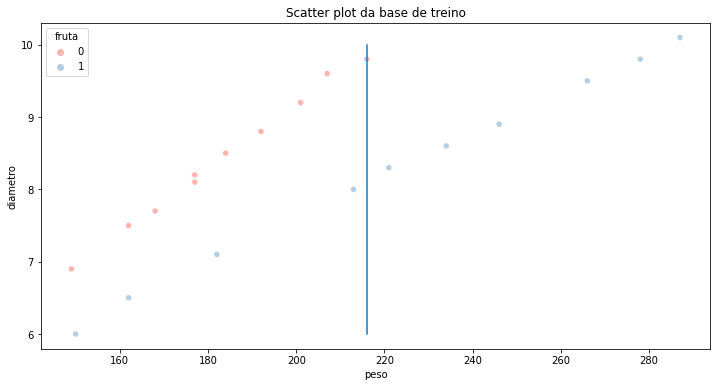

In [18]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_train, x='peso', y='diametro', hue=y_train, palette='Pastel1')
plt.plot([one_rule.get_one_rule_threshold(), one_rule.get_one_rule_threshold()], [6, 10])
plt.title('Scatter plot da base de treino')
plt.show()

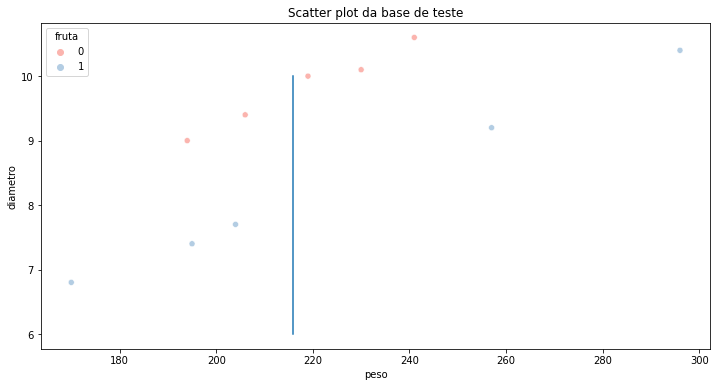

In [19]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(data=X_test, x='peso', y='diametro', hue=y_test, palette='Pastel1')
plt.plot([one_rule.get_one_rule_threshold(), one_rule.get_one_rule_threshold()], [6, 10])
plt.title('Scatter plot da base de teste')

plt.show()